In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('dc_bikes.csv')

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       17379 non-null  int64  
dtypes: float64(5), int64(6), object(1)
memory usage: 1.6+ MB


In [5]:
df = pd.read_csv('dc_bikes.csv', parse_dates=['datetime'])

In [6]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1


In [7]:
df = pd.read_csv('dc_bikes.csv', parse_dates=True, index_col=0)

In [8]:
# Extract features like hour, month, etc. from the datetime column into their own columns:

In [9]:
df['day'] = df.index.day

In [10]:
df['hour'] = df.index.hour

In [12]:
#df['week'] = df.index.week

In [13]:
df

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3.0,13.0,16,1,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8.0,32.0,40,1,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5.0,27.0,32,1,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3.0,10.0,13,1,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0.0,1.0,1,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2012-12-31 19:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,156,31,19
2012-12-31 20:00:00,1,0,1,2,10.66,12.880,60,11.0014,NaN,NaN,104,31,20
2012-12-31 21:00:00,1,0,1,1,10.66,12.880,60,11.0014,NaN,NaN,67,31,21


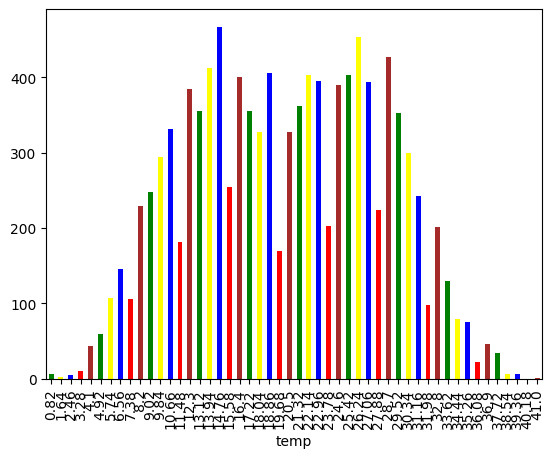

In [14]:
# Plot small sections of the count data over time (1 day, 1 week, etc.)

df.groupby('temp')['registered'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);

In [15]:
# Create a part_of_day column for the bike data. It should have the following labels: morning, afternoon, evening, night

df['hour'].min(), df['hour'].max()


(0, 23)

In [36]:
bin_labels = ['morning', 'afternoon', 'evening','night']

In [37]:
bin_boundaries = [-0.9,6.9, 12, 17, 23.8]

In [38]:
pd.cut(df['hour'], bins=bin_boundaries, labels=bin_labels)

season
1    morning
1    morning
1    morning
1    morning
1    morning
      ...   
1      night
1      night
1      night
1      night
1      night
Name: hour, Length: 17379, dtype: category
Categories (4, object): ['morning' < 'afternoon' < 'evening' < 'night']

In [39]:
df['part_of_day']=pd.cut(df['hour'], bins=bin_boundaries, labels=bin_labels)



In [40]:
df.head()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,part_of_day
season,,,,,,,,,,,,,
1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,1,0,morning
1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,morning
1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,1,2,morning
1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,1,3,morning
1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,1,4,morning


In [27]:
df.to_csv('new_dc_bikes.csv', index=False)

# Group data by one of the newly created time features and observe grouped means



In [28]:
import pandas as pd
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv('new_dc_bikes.csv')

In [30]:
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,day,hour,part_of_day
0,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16,1,0,NaN
1,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40,1,1,NaN
2,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32,1,2,NaN
3,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13,1,3,NaN
4,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1,1,4,NaN


In [31]:
df = pd.read_csv('new_dc_bikes.csv', parse_dates=True, index_col=0)

/var/folders/9w/mnvxlv2d3dz56vfrxd2g3gj40000gn/T/ipykernel_2056/1309498266.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df = pd.read_csv('new_dc_bikes.csv', parse_dates=True, index_col=0)


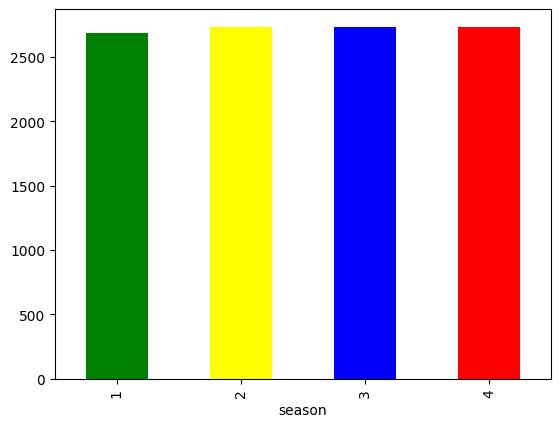

In [32]:
# Plot small sections of the count data over time (1 day, 1 week, etc.)

df.groupby('season')['registered'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);

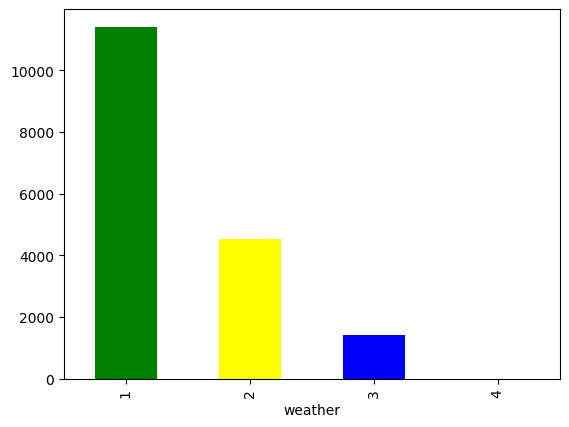

In [44]:
# Plot small sections of the count data over time (1 day, 1 week, etc.)

df.groupby('weather')['count'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);



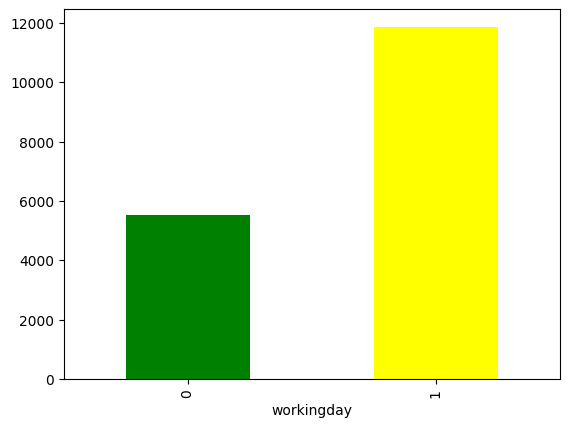

In [48]:
# Plot small sections of the count data over time (1 day, 1 week, etc.)

df.groupby('workingday')['count'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);

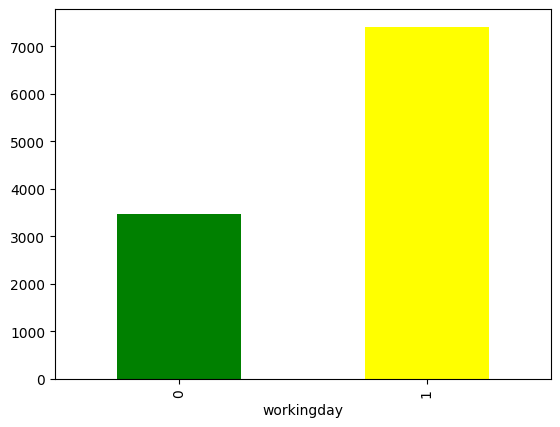

In [47]:
# Plot small sections of the count data over time (1 day, 1 week, etc.)

df.groupby('workingday')['count'].count().plot.bar(color=['green', 'yellow', 'blue', 'red', 'brown']);